# Load Dataset

# Hierarchical Clustering

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch #to draw dendrogram
from sklearn.cluster import AgglomerativeClustering #for model building

In [2]:
data=pd.read_csv(r'C:\Users\hp\Downloads\crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Eda 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
data.shape

(50, 5)

In [5]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
data[data.duplicated()].shape

(0, 5)

In [7]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

Dataset has no duplicate and missing value

In [8]:
#normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
data.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [10]:
data_norm=norm_func(data.iloc[:,1:])
data_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


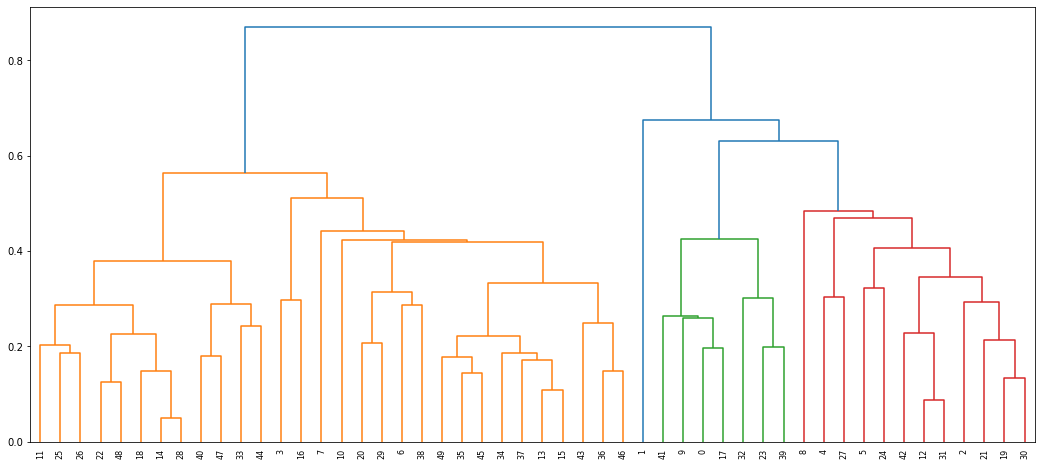

In [11]:
#create dendogram
plt.figure(figsize=(18,8))
dendrogram=sch.dendrogram(sch.linkage(data_norm,method='average'))

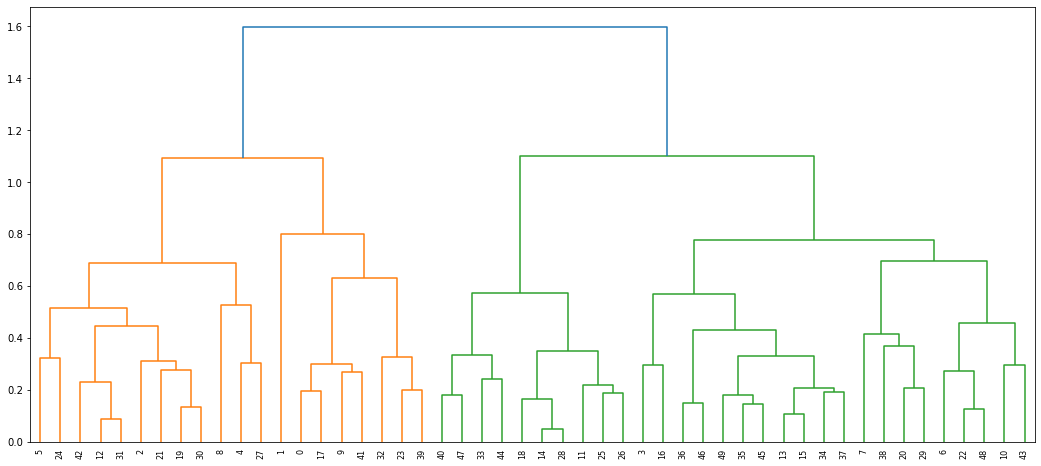

In [12]:
plt.figure(figsize=(18,8))
dendrogram=sch.dendrogram(sch.linkage(data_norm,method='complete'))

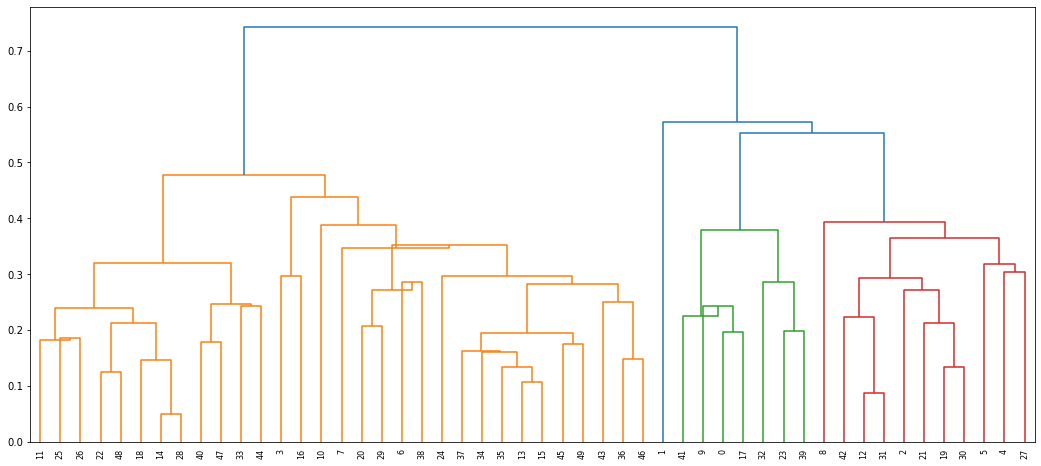

In [13]:
plt.figure(figsize=(18,8))
dendrogram=sch.dendrogram(sch.linkage(data_norm,method='centroid'))

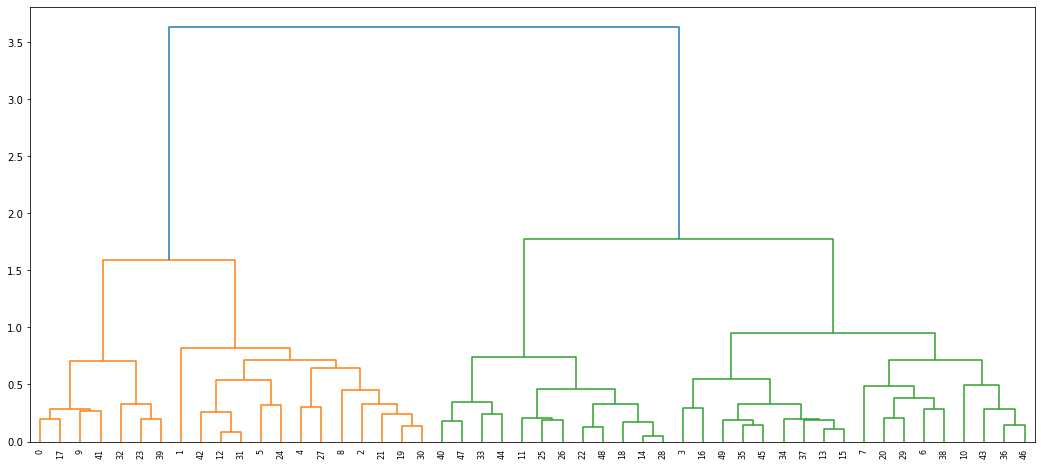

In [14]:
plt.figure(figsize=(18,8))
dendrogram=sch.dendrogram(sch.linkage(data_norm,method='ward'))

In [15]:
HC=AgglomerativeClustering(n_clusters=5, 
                           affinity='euclidean',
                           linkage='complete')

In [16]:
# save clusters for chart
Y_HC=HC.fit_predict(data_norm)
Clusters=pd.DataFrame(Y_HC,columns=['Clusters'])

In [17]:
Clusters

,Clusters
0,3
1,4
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [18]:
data_norm['h_clusterid']=Clusters

In [19]:
data_norm.sort_values('h_clusterid')

,Murder,Assault,UrbanPop,Rape,h_clusterid
49,0.361446,0.397260,0.474576,0.214470,0
20,0.216867,0.356164,0.898305,0.232558,0
29,0.397590,0.390411,0.966102,0.297158,0
16,0.536145,0.219178,0.338983,0.232558,0
15,0.313253,0.239726,0.576271,0.276486,0
34,0.391566,0.256849,0.728814,0.364341,0
13,0.385542,0.232877,0.559322,0.354005,0
35,0.349398,0.363014,0.610169,0.328165,0
22,0.114458,0.092466,0.576271,0.196382,0
10,0.271084,0.003425,0.864407,0.333333,0


In [20]:
data['h_clusterid']=Clusters

In [21]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [22]:
Clusters.value_counts()

Clusters
0           20
1           12
2           10
3            7
4            1
dtype: int64

In [23]:
data.sort_values('h_clusterid')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
49,Wyoming,6.8,161,60,15.6,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
16,Kentucky,9.7,109,52,16.3,0
15,Kansas,6.0,115,66,18.0,0
34,Ohio,7.3,120,75,21.4,0
13,Indiana,7.2,113,65,21.0,0
35,Oklahoma,6.6,151,68,20.0,0
22,Minnesota,2.7,72,66,14.9,0
10,Hawaii,5.3,46,83,20.2,0


# K-Means clustering

import dataset

In [24]:
crime=pd.read_csv(r'C:\Users\hp\Downloads\crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


normalize the data

In [25]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaled_df=Scaler.fit_transform(crime.iloc[:,1:])

In [26]:
Scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [27]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
from sklearn.cluster import KMeans #for k-means clustering and elbow chart
from sklearn.metrics import silhouette_score, calinski_harabasz_score

wcss = []
sil_score = []
cal_haz_score = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(Scaled_df)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue #min 2 labels needed for silhoutte and cal_haz score (Refer documentation)
    sil_score.append(silhouette_score(Scaled_df, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(Scaled_df, kmeans.labels_))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.31163939712256]

In [29]:
sil_score

[0.4084890326217641,
 0.3095091512791688,
 0.33968891433344395,
 0.30612803169146263,
 0.29910456843899946,
 0.23035904501364113,
 0.2732934287338534,
 0.2518939934580804,
 0.2652233759332704]

In [30]:
cal_haz_score

[43.46199150301377,
 35.18481487211701,
 37.94972059900646,
 33.28658302470653,
 31.26605066475041,
 28.205209929782704,
 28.594705898193535,
 26.214354074691737,
 26.952143948781234]

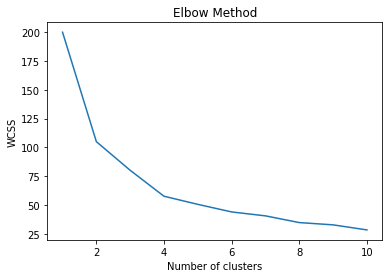

In [31]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Basically Elbow plot used to identify the best K-value, In this case we choose  'k' values is k=4.

In [32]:
#Build Cluster algorithm
clusters_k = KMeans(4, random_state = 42)
clusters_k.fit(Scaled_df)

KMeans(n_clusters=4, random_state=42)

In [33]:
clusters_k.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [34]:
#Assign clusters to the data set
crime['clusterid_k'] = clusters_k.labels_

In [35]:
#these are standardized values.
clusters_k.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [36]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_k
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [37]:
crime.groupby('clusterid_k').agg(['mean']).reset_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_9620\1666582524.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('clusterid_k').agg(['mean']).reset_index()


,clusterid_k,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [38]:
crime.groupby('clusterid_k').mean()
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_k
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [39]:
crime.sort_values('clusterid_k')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_k
49,Wyoming,6.8,161,60,15.6,0
29,New Jersey,7.4,159,89,18.8,0
15,Kansas,6.0,115,66,18.0,0
34,Ohio,7.3,120,75,21.4,0
13,Indiana,7.2,113,65,21.0,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0
10,Hawaii,5.3,46,83,20.2,0
37,Pennsylvania,6.3,106,72,14.9,0
7,Delaware,5.9,238,72,15.8,0


In [40]:
crime['clusterid_k'].value_counts()

0    16
2    13
3    13
1     8
Name: clusterid_k, dtype: int64

# DB-SCAN CLUSTERING

In [41]:
df=pd.read_csv(r'C:\Users\hp\Downloads\crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [42]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


<AxesSubplot:>

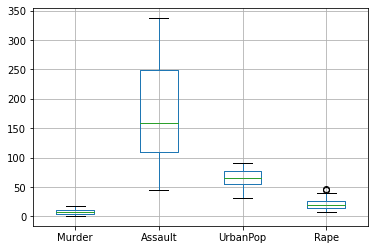

In [43]:
df.boxplot()

<AxesSubplot:>

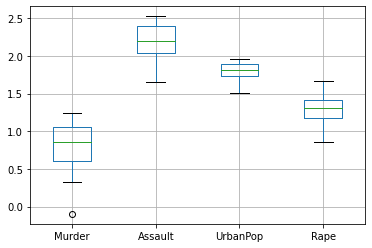

In [44]:
df.apply(np.log10).boxplot()

we get some rough idea about outliar

In [45]:
array=df.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [46]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [47]:
#min_samples=6
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.8, min_samples = 6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [48]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [49]:
clusters=pd.DataFrame(dbscan.labels_,columns=['clusters'])

In [50]:
clusters.value_counts()

clusters
-1          42
 0           8
dtype: int64

In [51]:
from sklearn.cluster import DBSCAN
dbscan2 = DBSCAN(eps = 1.1, min_samples = 5)
dbscan2.fit(X)

DBSCAN(eps=1.1)

In [52]:
dbscan2.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [53]:
clusters=pd.DataFrame(dbscan2.labels_,columns=['clusters'])

In [54]:
clusters.value_counts()

clusters
 0          30
-1          20
dtype: int64

In [55]:
from sklearn.cluster import DBSCAN
dbscan3 = DBSCAN(eps = 1.2, min_samples = 5)
dbscan3.fit(X)

DBSCAN(eps=1.2)

In [56]:
dbscan3.labels_

array([ 0, -1, -1,  1, -1, -1,  1,  1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [57]:
clusters=pd.DataFrame(dbscan3.labels_,columns=['clusters'])

In [58]:
clusters.value_counts()

clusters
 1          32
-1          13
 0           5
dtype: int64

# Note-

1) i am taking min sample=5 and 6 because we have 4 dimension in dataset and usally we take 
   min sample= dimension in dataset + 1 

2) i am taking eps = 1.2 cause i cant allowed noise more than 30%

In [59]:
cl_id = pd.DataFrame(dbscan3.labels_, columns=['cluster'])

In [60]:
cl_id

,cluster
0,0
1,-1
2,-1
3,1
4,-1
5,-1
6,1
7,1
8,-1
9,0


In [61]:
clustered = pd.concat([df,cl_id],axis=1)
clustered

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [62]:
clustered[clustered['cluster'] == -1]

,Murder,Assault,UrbanPop,Rape,cluster
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
8,15.4,335,80,31.9,-1
12,10.4,249,83,24.0,-1
19,11.3,300,67,27.8,-1
21,12.1,255,74,35.1,-1
23,16.1,259,44,17.1,-1
27,12.2,252,81,46.0,-1


In [63]:
clustered.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
cluster       0.380
dtype: float64

In [64]:
clustered.sort_values('cluster')

,Murder,Assault,UrbanPop,Rape,cluster
30,11.4,285,70,32.1,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
32,13.0,337,45,16.1,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
27,12.2,252,81,46.0,-1
23,16.1,259,44,17.1,-1
8,15.4,335,80,31.9,-1
21,12.1,255,74,35.1,-1


In [65]:
X.shape

(50, 4)

# Note

1) Eda part just like data(info,shape,describe,missing value,duplicates) not doing again and again cause we perform in same data set doing once first